In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key = "e350ecd0f8457e05a2d7e54f90968b59"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

559

In [3]:
# OpenWeatherMap API Key
api_key = "e350ecd0f8457e05a2d7e54f90968b59"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Wagrowiec
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=wagrowiec
Processing Record 2 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=mataura
Processing Record 3 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=bluff
Processing Record 4 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=bethel
Processing Record 5 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=castro
Processing Record 6 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=norman%20wells
Processing Record 7 | Inuvik
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 57 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=thompson
Processing Record 58 | Swan River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=swan%20river
Processing Record 59 | Rubiera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=rubiera
Processing Record 60 | Homer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=homer
Processing Record 61 | Comodoro Rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=comodoro%20rivadavia
Processing Record 62 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=meulaboh
Processing Record 63 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2

Processing Record 113 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=port%20elizabeth
Processing Record 114 | Okha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=okha
Processing Record 115 | Poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=poum
Processing Record 116 | Alta Floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=alta%20floresta
Processing Record 117 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=hobart
Processing Record 118 | Waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=waipawa
Processing Record 119 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54

Processing Record 168 | Lev Tolstoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=lev%20tolstoy
Processing Record 169 | Shaowu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=shaowu
Processing Record 170 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=esperance
Processing Record 171 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=upernavik
Processing Record 172 | Mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=mnogovershinnyy
Processing Record 173 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=constitucion
Processing Record 174 | Gushikawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 223 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=hithadhoo
Processing Record 224 | Anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=anadyr
Processing Record 225 | Loukhi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=loukhi
City not found. Skipping...
Processing Record 226 | Sarkand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=sarkand
Processing Record 227 | Rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=rocha
City not found. Skipping...
Processing Record 228 | Hanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=hanna
Processing Record 229 | Fort Nelson
http://api.openweathermap.org/data/2.5/weather?units=Imper

City not found. Skipping...
Processing Record 279 | Yaan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=yaan
Processing Record 280 | Taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=taltal
Processing Record 281 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=yar-sale
Processing Record 282 | Port Hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=port%20hedland
Processing Record 283 | San Vicente de Canete
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=san%20vicente%20de%20canete
Processing Record 284 | Hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=hualmay
Processing Record 285 | Bathsheba
http://api.openweathermap.org/data/2.5/w

City not found. Skipping...
Processing Record 335 | Durango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=durango
Processing Record 336 | Amguri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=amguri
Processing Record 337 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=dunedin
Processing Record 338 | Honningsvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=honningsvag
Processing Record 339 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=beringovskiy
City not found. Skipping...
Processing Record 340 | Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=margate
Processing Record 341 | Tautira
http://api.openweathermap.org/data/2.5

Processing Record 390 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=namibe
Processing Record 391 | Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=sao%20joao%20da%20barra
Processing Record 392 | Bangolo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=bangolo
Processing Record 393 | Mtwango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=mtwango
City not found. Skipping...
Processing Record 394 | Verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=verkhnevilyuysk
Processing Record 395 | Cuaspud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=cuaspud
Processing Record 396 | Oyama
http://api.openweathermap.org/data/2.5/weath

Processing Record 446 | Oistins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=oistins
Processing Record 447 | Moerai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=moerai
Processing Record 448 | Shubarshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=shubarshi
Processing Record 449 | Zabid
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=zabid
Processing Record 450 | Fukue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=fukue
Processing Record 451 | Okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=okhotsk
Processing Record 452 | Pirovskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=pirovskoye

Processing Record 501 | Batavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=batavia
Processing Record 502 | Mushie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=mushie
Processing Record 503 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=makakilo%20city
Processing Record 504 | Carauari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=carauari
Processing Record 505 | Rio Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=rio%20grande
Processing Record 506 | Yoichi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e350ecd0f8457e05a2d7e54f90968b59&q=yoichi


In [11]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          506
Cloudiness    506
Country       506
Date          506
Humidity      506
Lat           506
Lng           506
Max Temp      506
Wind Speed    506
dtype: int64

In [12]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Wagrowiec,0,PL,1564879784,77,52.81,17.20,60.01,5.82
1,Mataura,100,NZ,1564879661,83,-46.19,168.86,38.57,10.40
2,Bluff,0,AU,1564879686,48,-23.58,149.07,67.19,12.39
3,Bethel,90,US,1564879787,100,60.79,-161.76,60.80,16.11
4,Castro,90,CL,1564879788,93,-42.48,-73.76,44.60,5.82


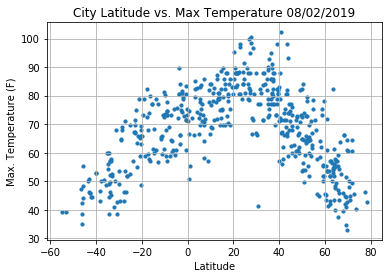

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature 08/02/2019")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temp_Latitude.png")

# Show plot
plt.show()

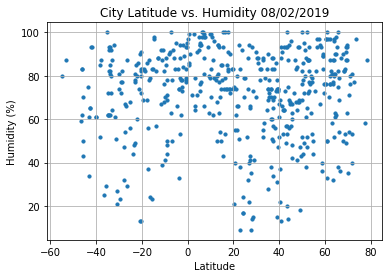

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity 08/02/2019")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Ploting_graph_of_Cities.png")

# Show plot
plt.show()

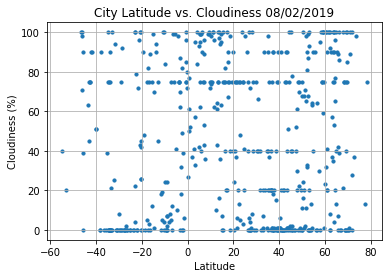

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness 08/02/2019")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_Latitude.png")

# Show plot
plt.show()

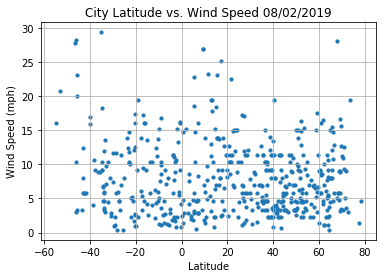

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed 08/02/2019")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_Latitude.png")

# Show plot
plt.show()